In [ ]:
from keras.datasets import fashion_mnist
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

In [ ]:
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

print('Training data shape : ', train_X.shape, train_Y.shape)

print('Testing data shape : ', test_X.shape, test_Y.shape)

Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)


In [ ]:
# Find the unique numbers from the train labels
classes = np.unique(train_Y)
nClasses = len(classes)

print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : 9')

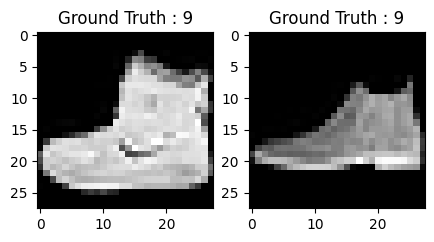

In [ ]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[0]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[0]))

As a first step, convert each 28 x 28 image of the train and test set into a matrix of size 28 x 28 x 1 which is fed into the network.

In [ ]:
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X.shape, test_X.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

* int8 to float32
* rescale the pixel values in range 0 - 1

In [ ]:
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
test_X = test_X / 255.

In [ ]:
# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])


Original label: 9
After conversion to one-hot: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [ ]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot, test_size=0.2, random_state=13)

In [ ]:
train_X.shape,valid_X.shape,train_label.shape,valid_label.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (48000, 10), (12000, 10))

In [ ]:
!pip install keras
import keras

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Input
from tensorflow.keras.layers import BatchNormalization, LeakyReLU

In [ ]:
batch_size = 64
epochs = 20
num_classes = 10

* The Sequential() function initializes an empty model object.
* The Conv2D() function adds a 2D convolutional layer to the model with 32 filters, a kernel size of 3x3, and a linear activation function.
* The input_shape parameter specifies the shape of the input images (28x28 pixels with 1 color channel).
* The padding parameter is set to 'same', which means that the output feature maps will have the same spatial dimensions as the input feature maps.
* The LeakyReLU() function adds a leaky rectified linear unit activation function to the model with an alpha value of 0.1.
* This helps to prevent the vanishing gradient problem and improve the model's performance.
* The MaxPooling2D() function adds a 2D max pooling layer to the model with a pool size of 2x2 and 'same' padding.
* This reduces the spatial dimensions of the feature maps and helps to prevent overfitting.
* The above steps are repeated with increasing number of filters (64 and 128) and the same kernel size and padding.
* The Flatten() function flattens the output of the previous layer into a 1D array, which can be fed into a fully connected layer.
* The Dense() function adds a fully connected layer to the model with 128 neurons and a linear activation function.
* The LeakyReLU() function is again added to the model with an alpha value of 0.1.
* Finally, the Dense() function adds an output layer to the model with a number of neurons equal to the number of classes in the dataset and a softmax activation function.
* This allows the model to output a probability distribution over the classes for each input image.

In [ ]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',input_shape=(28,28,1),padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))

fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(Dense(num_classes, activation='softmax'))

In [ ]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])


[Adam Opt](https://https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/)

In [ ]:
fashion_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                 

In [ ]:
# Fit the model
fashion_train = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))


Epoch 1/20
750/750 [==============================] - 101s 132ms/step - loss: 0.4658 - accuracy: 0.8278 - val_loss: 0.3525 - val_accuracy: 0.8699
Epoch 2/20
750/750 [==============================] - 89s 119ms/step - loss: 0.2880 - accuracy: 0.8926 - val_loss: 0.2956 - val_accuracy: 0.8959
Epoch 3/20
750/750 [==============================] - 92s 123ms/step - loss: 0.2411 - accuracy: 0.9118 - val_loss: 0.2872 - val_accuracy: 0.9020
Epoch 4/20
750/750 [==============================] - 88s 117ms/step - loss: 0.2097 - accuracy: 0.9230 - val_loss: 0.2254 - val_accuracy: 0.9173
Epoch 5/20
750/750 [==============================] - 87s 116ms/step - loss: 0.1846 - accuracy: 0.9317 - val_loss: 0.2453 - val_accuracy: 0.9122
Epoch 6/20
750/750 [==============================] - 87s 116ms/step - loss: 0.1621 - accuracy: 0.9396 - val_loss: 0.2352 - val_accuracy: 0.9186
Epoch 7/20
750/750 [==============================] - 87s 116ms/step - loss: 0.1392 - accuracy: 0.9480 - val_loss: 0.2426 - val_a

In [ ]:
import joblib
# Save RL_Model to file in the current working directory

joblib_file = "joblib_test_Model.pkl"
joblib.dump(fashion_train, joblib_file)

['joblib_test_Model.pkl']

In [ ]:
#joblib_LR_model = joblib.load(joblib_file)
#joblib_LR_model

In [ ]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 0.45788729190826416
Test accuracy: 0.9180999994277954


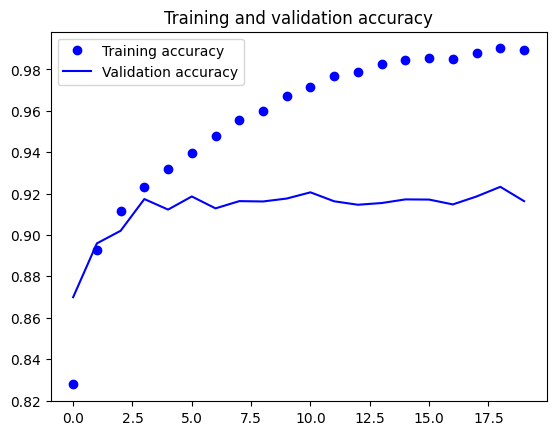

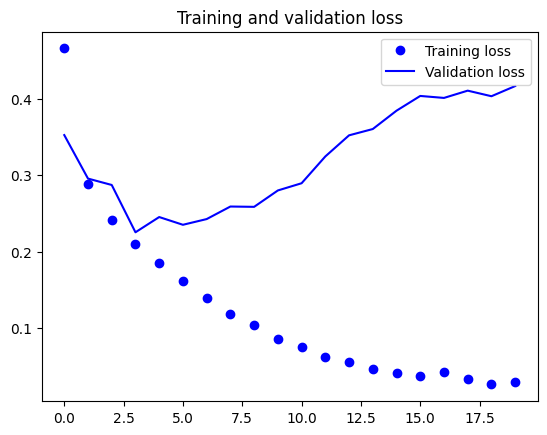

In [ ]:
accuracy = fashion_train.history['accuracy']
val_accuracy = fashion_train.history['val_accuracy']
loss = fashion_train.history['loss']
val_loss = fashion_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


From the above two plots, you can see that the validation accuracy almost became stagnant after 4-5 epochs and rarely increased at certain epochs. In the beginning, the validation accuracy was linearly increasing with loss, but then it did not increase much.

The validation loss shows that this is the sign of overfitting, similar to validation accuracy it linearly decreased but after 4-5 epochs, it started to increase. This means that the model tried to memorize the data and succeeded.

With this in mind, it's time to introduce some dropout into our model and see if it helps in reducing overfitting.

In [ ]:
batch_size = 64
epochs = 20
num_classes = 10

In [ ]:
fashion_model = Sequential()
fashion_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='same',input_shape=(28,28,1)))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D((2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.25))
fashion_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
fashion_model.add(Dropout(0.4))
fashion_model.add(Flatten())
fashion_model.add(Dense(128, activation='linear'))
fashion_model.add(LeakyReLU(alpha=0.1))
fashion_model.add(Dropout(0.3))
fashion_model.add(Dense(num_classes, activation='softmax'))

In [ ]:
fashion_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 leaky_re_lu_8 (LeakyReLU)   (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 14, 14, 64)        0         
                                                      

In [ ]:
fashion_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

In [ ]:
fashion_train_dropout = fashion_model.fit(train_X, train_label, batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X, valid_label))

Epoch 1/20
750/750 [==============================] - 103s 134ms/step - loss: 0.6056 - accuracy: 0.7743 - val_loss: 0.3846 - val_accuracy: 0.8593
Epoch 2/20
750/750 [==============================] - 98s 131ms/step - loss: 0.3766 - accuracy: 0.8615 - val_loss: 0.3110 - val_accuracy: 0.8852
Epoch 3/20
750/750 [==============================] - 102s 137ms/step - loss: 0.3287 - accuracy: 0.8786 - val_loss: 0.2780 - val_accuracy: 0.8975
Epoch 4/20
750/750 [==============================] - 98s 131ms/step - loss: 0.3009 - accuracy: 0.8884 - val_loss: 0.2690 - val_accuracy: 0.9012
Epoch 5/20
750/750 [==============================] - 96s 127ms/step - loss: 0.2828 - accuracy: 0.8951 - val_loss: 0.2485 - val_accuracy: 0.9066
Epoch 6/20
750/750 [==============================] - 98s 130ms/step - loss: 0.2675 - accuracy: 0.9003 - val_loss: 0.2392 - val_accuracy: 0.9128
Epoch 7/20
750/750 [==============================] - 96s 128ms/step - loss: 0.2524 - accuracy: 0.9057 - val_loss: 0.2307 - val_

In [ ]:
fashion_model.save("fashion_model_dropout.h5py")

In [ ]:
test_eval = fashion_model.evaluate(test_X, test_Y_one_hot, verbose=1)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

313/313 [==============================] - 7s 21ms/step - loss: 0.2234 - accuracy: 0.9191
Test loss: 0.22340510785579681
Test accuracy: 0.9190999865531921


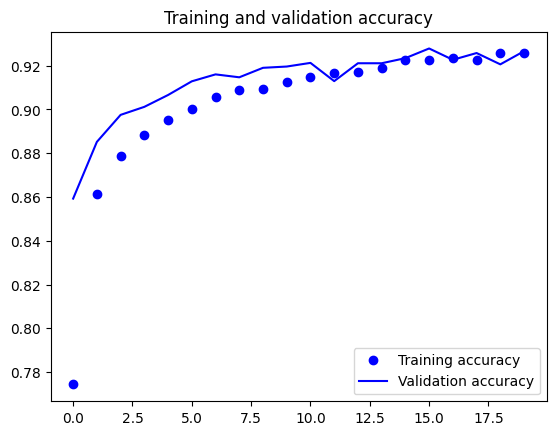

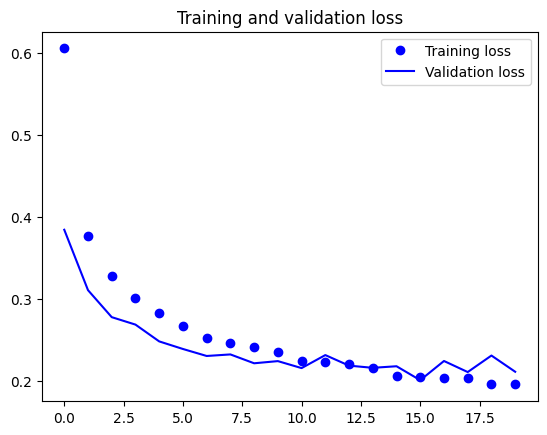

In [ ]:
accuracy = fashion_train_dropout.history['accuracy']
val_accuracy = fashion_train_dropout.history['val_accuracy']
loss = fashion_train_dropout.history['loss']
val_loss = fashion_train_dropout.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
predicted_classes = fashion_model.predict(test_X)

313/313 [==============================] - 7s 21ms/step


In [ ]:
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)

In [ ]:
predicted_classes.shape, test_Y.shape

((10000,), (10000,))

Found 9160 correct labels


<ipython-input-51-72b92a47d0be>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)


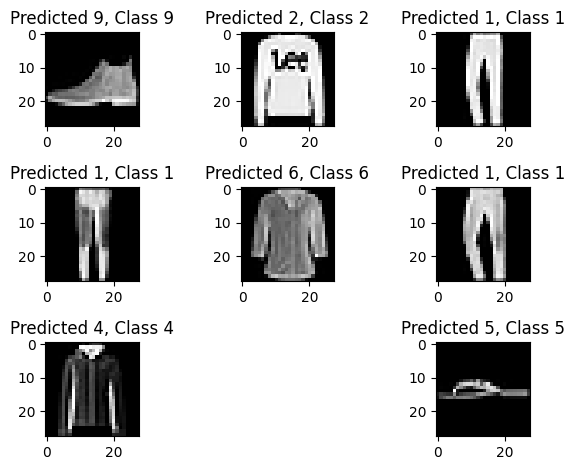

In [ ]:
correct = np.where(predicted_classes==test_Y)[0]
print ("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], test_Y[correct]))
    plt.tight_layout()

Found 840 incorrect labels


<ipython-input-52-d1a4105df464>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,3,i+1)


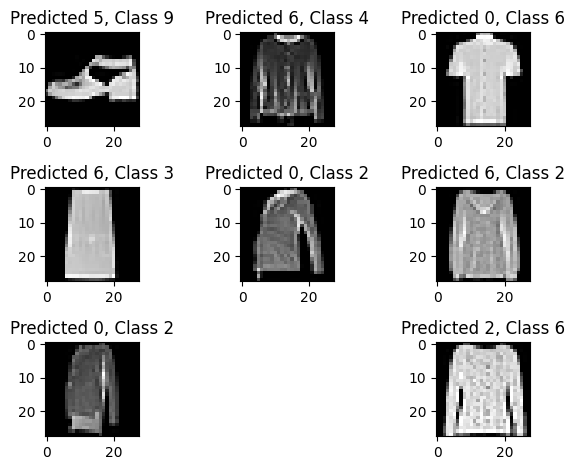

In [ ]:
incorrect = np.where(predicted_classes!=test_Y)[0]
print ("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(test_X[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], test_Y[incorrect]))
    plt.tight_layout()


In [ ]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(test_Y, predicted_classes, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       0.78      0.91      0.84      1000
     Class 1       1.00      0.98      0.99      1000
     Class 2       0.87      0.88      0.88      1000
     Class 3       0.92      0.92      0.92      1000
     Class 4       0.91      0.81      0.86      1000
     Class 5       0.98      0.99      0.99      1000
     Class 6       0.78      0.75      0.76      1000
     Class 7       0.97      0.97      0.97      1000
     Class 8       0.99      0.98      0.99      1000
     Class 9       0.98      0.97      0.98      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



* [Ref](https://https://www.datacamp.com/tutorial/convolutional-neural-networks-python)
* [Read more](http://neuralnetworksanddeeplearning.com/chap5.html)